In [3]:
import numpy as np
from tensorflow.keras import (
    datasets, 
    utils,
    layers,
    models,
    optimizers
)
import matplotlib.pyplot as plt

2024-09-19 21:13:27.399438: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [1]:
# CNN APPROACH

A 3 × 3 × 1 kernel (gray) being passed over a 5 × 5 × 1 input image (blue), with padding = "same" and strides = 1, to generate the 5 × 5 × 1 output (green)

The padding = "same" input parameter pads the input
data with zeros so that the output size from the layer is
exactly the same as the input size when strides = 1.

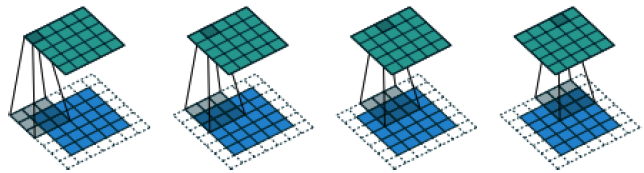

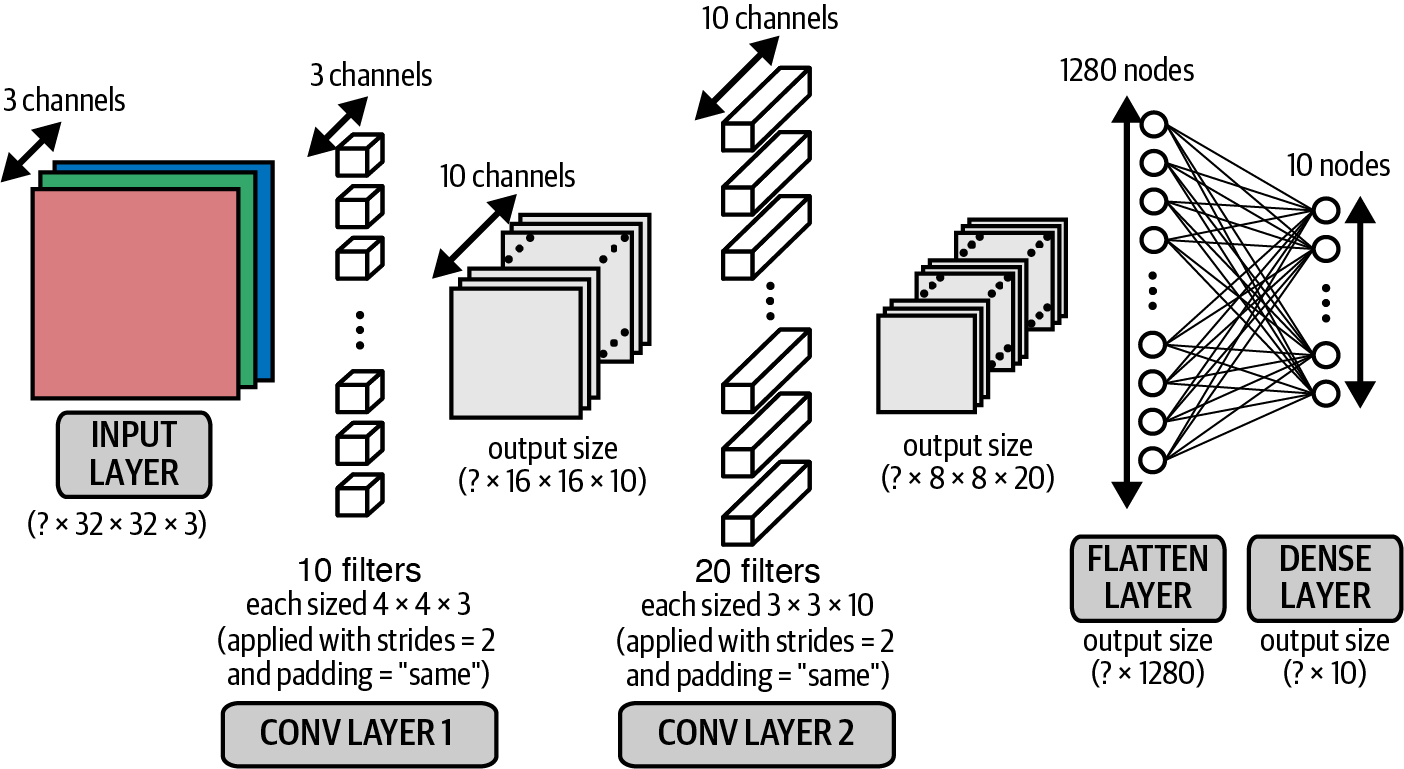


When applying 10 filters of size 4x4x3 to an image of size 32x32x3 with a stride of 2 and padding set to 'same', we get an output tensor with dimensions 16x16x10 because:

    Filters (Convolutional Kernels):
        filters=10: Defines the number of output channels. Each filter extracts a specific feature from the input image.
        kernel_size(filter_size)=(4,4): Defines the size of the area that the filter will scan across the image.
        The filter depth (3) corresponds to the number of input channels (RGB), as the image has 3 channels (red, green, blue).

    Strides=2: Defines how far the filter moves across the image after each application. A stride of 2 means that the filter moves by 2 pixels at a time, both horizontally and vertically.

    Padding='same': Ensures that the spatial dimensions of the output tensor are preserved by adding extra pixels (usually zeros) around the borders of the input image. With padding set to 'same', the output dimensions are computed as:
    Output Dimension=⌈Input DimensionStride⌉
    Output Dimension=⌈StrideInput Dimension​⌉

Where ⌈⋅⌉⌈⋅⌉ means rounding up to the nearest integer.
Output Dimension Calculation

Let’s break down how the output tensor dimensions are calculated:

    Input image: 32 (height) x 32 (width) x 3 (channels).

    Padding='same':

        Ensures that the image’s dimensions are preserved after the convolution, if the stride equals 1. However, with a stride greater than 1, the dimensions decrease.

        For a stride of 2:
        Output Height=⌈322⌉=16
        Output Height=⌈232​⌉=16

    Number of Filters: Since 10 filters are used, the output tensor will have 10 channels, one for each filter.

Thus, the final output tensor dimensions are:

16×16×10
Final Explanation:

    The spatial dimensions (16x16) are reduced due to the stride of 2, which cuts each dimension in half.
    The depth (10) is determined by the number of filters applied to the image.

Visual Example

Imagine you have a grid of 32x32 pixels. By applying a filter of size 4x4 and moving with a step of 2, you cover different parts of the image with overlap, allowing you to extract various features. Since you are using 10 filters, you get 10 different feature maps, each responsible for detecting specific characteristics of the image.
Conclusion

The parameter filters=10 determines the number of different features that will be extracted from the input image, while the parameters kernel_size=(4,4), strides=2, and padding='same' control how these features are extracted and how the output dimensions change. The result is a tensor of size 16x16x10, where each of the 10 feature maps represents different aspects of the original image.

In [4]:
input_layer =layers.Input(shape=(32,32,3))
conv_layer_1 = layers.Conv2D(
    filters=10,
    kernel_size=(4,4),
    strides=2,
    padding='same',    
)(input_layer)
conv_layer_2 = layers.Conv2D(
    filters=20,
    kernel_size=(3,3),
    strides=2,
    padding='same'
)(conv_layer_1)
flatten_layer = layers.Flatten()(conv_layer_2)
output_layer = layers.Dense(units=10,
                            activation='softmax'
)(flatten_layer)
model_cnn = models.Model(input_layer, output_layer)

2024-09-19 21:13:33.836313: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-19 21:13:33.858988: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-19 21:13:33.859023: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-19 21:13:33.863063: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-19 21:13:33.863125: I external/local_xla/xla/stream_executor

In [5]:
# the number of parameters (or weights) in the layer is (4 × 4 × 3 + 1) × 10 = 490

# In the second convolutional layer, we choose the filters
# to be 3 × 3 and they now have depth 10, to match the
# number of channels in the previous layer. Since there
# are 20 filters in this layer, this gives a total number of
# parameters (weights) of (3 × 3 × 10 + 1) × 20 = 1,820
model_cnn.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 16, 16, 10)     │           490 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 20)       │         1,820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,120 (59.06 KB)

 Trainable params: 15,120 (59.06 KB)

 Non-trainable params: 0 (0.00 B)